<a href="https://colab.research.google.com/github/AdiDev1411/Machine-learning/blob/main/Practical5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

**Load and explore the dataset using pandas, examining
variable types and distributions.**

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
26,7,147,76,0,0,39.4,0.257,43,1
166,3,148,66,25,0,32.5,0.256,22,0
199,4,148,60,27,318,30.9,0.150,29,1
111,8,155,62,26,495,34.0,0.543,46,1
239,0,104,76,0,0,18.4,0.582,27,0


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


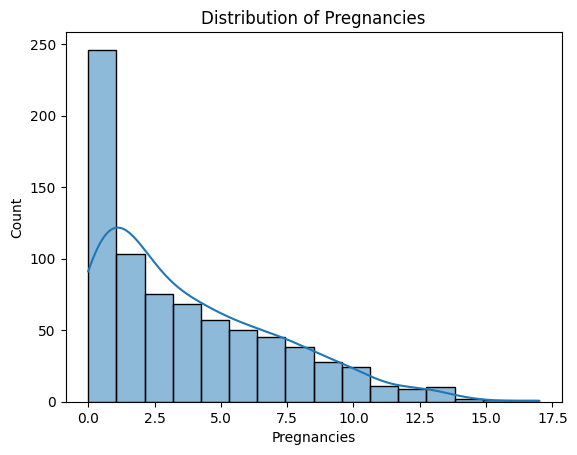

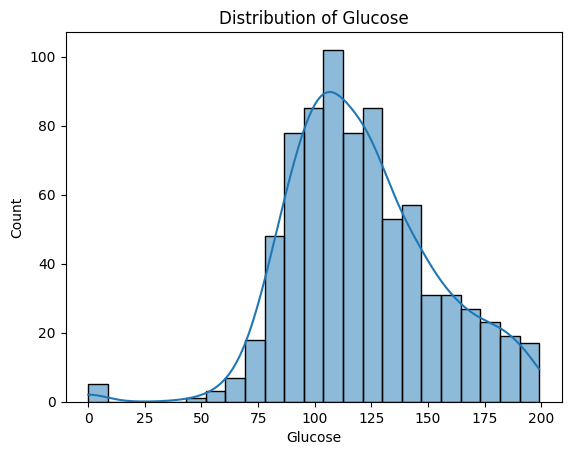

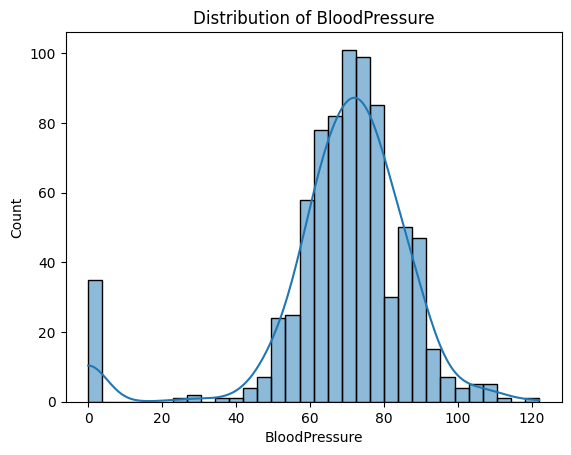

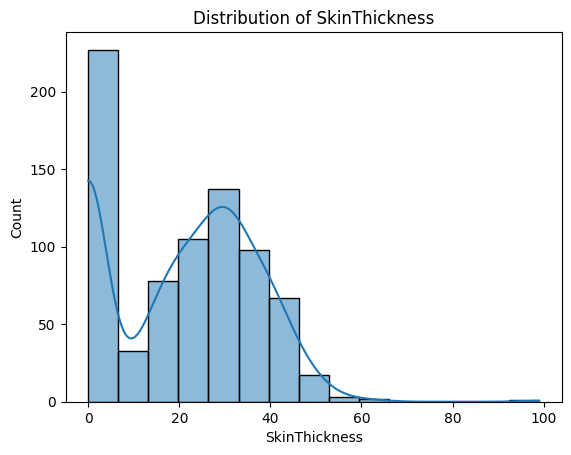

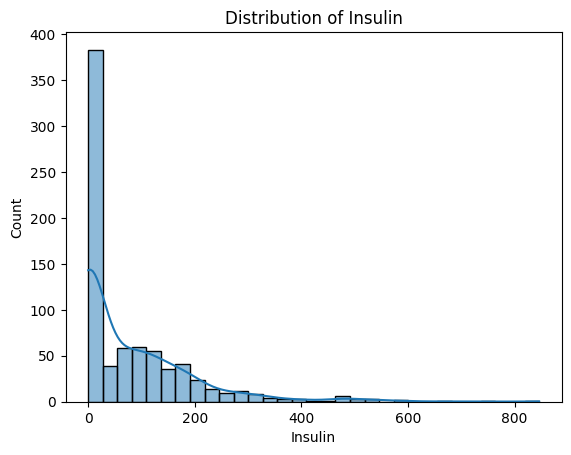

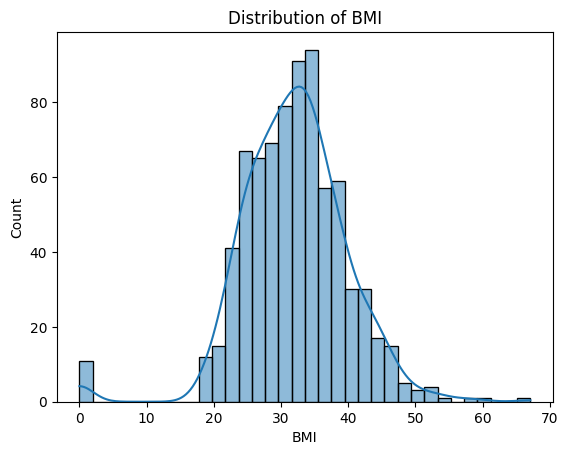

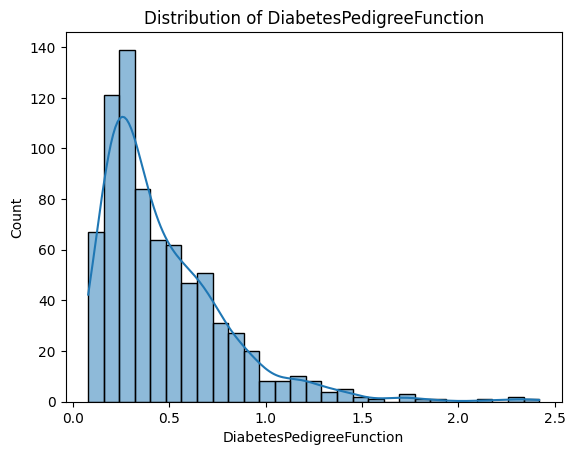

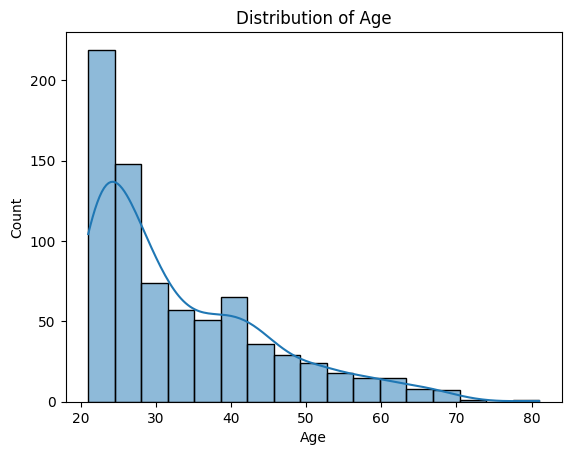

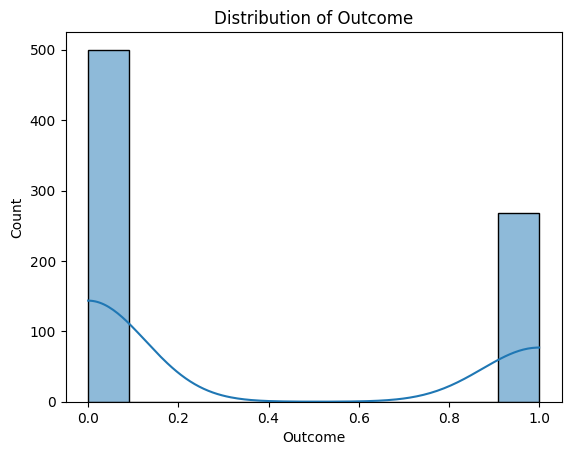

In [8]:
for col in df.columns:
  sns.histplot(df[col], kde=True)  # Replace with actual column name
  plt.title(f"Distribution of {col}")
  plt.show()


**Preprocess data: handle missing values, encode categorical
variables, normalize or standardize numeric fields.**

In [9]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [43]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]


In [44]:
print(X.shape , y.shape)

(768, 8) (768,)


In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [46]:
scaler.fit(X)

StandardScaler()

In [47]:
x_scaled = scaler.transform(X)
# x_test_scaled = scaler.transform(X_test)

In [48]:
x_scaled = pd.DataFrame(x_scaled , columns=X.columns)

In [31]:
# x_tesscaled = pd.DataFrame(x_test_scaled , columns=X_test.columns)

In [49]:
x_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


**Identify class imbalance and apply appropriate handling (e.g.,
SMOTE, stratified sampling, class weights).**

In [41]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [39]:
#Using SMOTE

In [40]:
from imblearn.over_sampling import SMOTE

In [42]:
sm = SMOTE()

In [50]:
X_res , y_res = sm.fit_resample(x_scaled , y)

In [51]:
y_res.value_counts()

,count
Outcome,
1,500
0,500


In [52]:
X_res.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


# **Train a logistic regression or decision tree classifier using Scikit-learn.**

In [54]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split( X_res , y_res , train_size=0.3)

In [73]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [110]:
dtc = DecisionTreeClassifier(max_depth=5)

In [111]:
dtc.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=5)

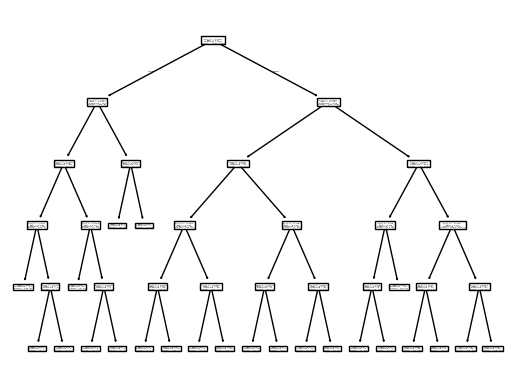

In [112]:
plot_tree(dtc)
plt.show()

In [113]:
y_pred = dtc.predict(X_test)


In [114]:
from sklearn.metrics import confusion_matrix


In [115]:
confusion_matrix(y_true=y_test , y_pred=y_pred)

array([[236, 114],
       [ 76, 274]])

In [116]:
from sklearn.metrics import accuracy_score

In [117]:
print("Accuracy_score",accuracy_score(y_test , y_pred))

Accuracy_score 0.7285714285714285
